In [109]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [62]:
dataset = pd.read_excel("C:\\Users\\Aditya\\Desktop\\Feedback_copy\\ml\\Datasets\\Dataset-SA.xlsx")

In [127]:
df = pd.read_excel("C:\\Users\\Aditya\\Desktop\\Feedback_copy\\ml\\Datasets\\Dataset-SA.xlsx")

In [63]:
dataset.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,DivineCrafts Om Swastik 2 Pocket penstand Wood...,159,5,must buy!,excellent,positive
1,"POCO C31 (Royal Blue, 64 GB)?ÐÒÐÒ?ÐÒÐÒ...",7499,5,awesome,good phone,positive
2,HAIR & CARE Triple Blend Damage Repair Non-Sti...,113,3,decent product,supar,positive
3,Mivi Fort S16 Soundbar with 2 full range drive...,1499,5,excellent,thnku for this wonderful product,positive
4,Women Regular Fit Cream Viscose Rayon Trousers,349,5,NaN,very nice,positive


In [64]:
dataset.shape

(58232, 6)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58232 entries, 0 to 58231
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   58232 non-null  object
 1   product_price  58232 non-null  object
 2   Rate           58232 non-null  object
 3   Review         50953 non-null  object
 4   Summary        58232 non-null  object
 5   Sentiment      58232 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [66]:
dataset.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,58232,58232,58232,50953,58232,58232
unique,950,521,6,521,33262,2
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,not specified,good,positive
freq,1534,2310,21653,2361,3183,30000


In [67]:
dataset = dataset[["Summary", "Sentiment"]]

In [68]:
dataset.head(2)

,Summary,Sentiment
0,excellent,positive
1,good phone,positive


In [69]:
import os
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.preprocessing import LabelEncoder

In [74]:

def text_preprocessing(text):

        #Remove html tags
        pattern = re.compile('<.*?>')
        text =  pattern.sub(r'', text)
    
        #Remove urls
        #text = re.sub(r'https?://\S+|www\.\S+', '', text)
        temp = re.compile(r'https?://\S+|www\.\S+')
        text =  temp.sub('', text)

        #Lowering the text
        text = text.lower()

        #Removing punctions
        '''
        exclude = string.punctuation
        text =  text.translate(str.maketrans('','',exclude))
        '''
        text =  text.translate(str.maketrans('','',string.punctuation))

        #Tokanizing text
        text = word_tokenize(text)

        #Removinng stopwords
        stopwords_to_remove = stopwords.words('english')
        text = [word for word in text if word not in stopwords_to_remove]
        '''
        for w in text.split():
            if w in stopwords_to_remove:
                text = ''.join(text.replace(w, ''))
        '''

        #Lemmatization
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text])

        return text

In [71]:
X = dataset['Summary']
y = dataset['Sentiment']

In [ ]:
print(type(X))
print(type(y))
print(len(X))
print(len(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
58232
58232


In [72]:
X.head(3)

0     excellent
1    good phone
2         supar
Name: Summary, dtype: object

In [77]:
batch_size = 10000
results = []

for i in range(0, len(X), batch_size):
    batch = dataset['Summary'].iloc[i:i+batch_size].apply(text_preprocessing)
    results.append(batch)

dataset['Summary'] = pd.concat(results)


In [78]:
X = dataset['Summary']
y = dataset['Sentiment']

In [79]:
l = LabelEncoder()
y = l.fit_transform(y)

In [82]:
print(type(X))
print(len(X))
print(type(y))
print(len(y))

<class 'pandas.core.series.Series'>
58232
<class 'numpy.ndarray'>
58232


In [93]:
print(len(X.unique()))
print(np.unique(y))

30691
[0 1]


In [94]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
tfidf_vectorizer = TfidfVectorizer(max_features=20000)

# Fit and train on the training  data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform on the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15612\224964709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Word', data=top_words, palette='viridis')


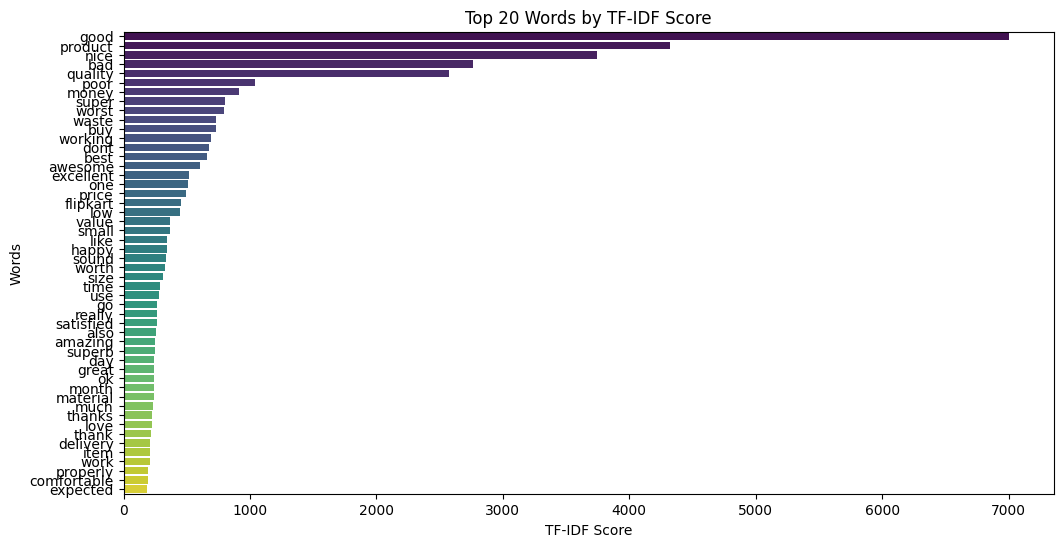

In [113]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.array(X_train_tfidf.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})
top_words = word_freq_df.sort_values(by='TF-IDF Score', ascending=False).head(50)
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF Score', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()


In [97]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15612\3122300845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Sentiment', palette='viridis')


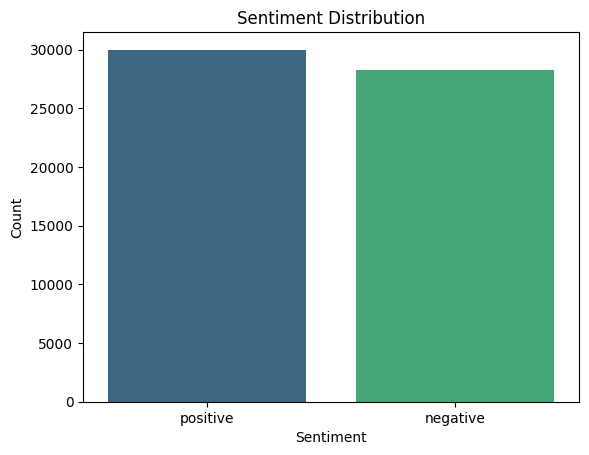

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=dataset, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# We will visualize the dataset distribution 


In [100]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


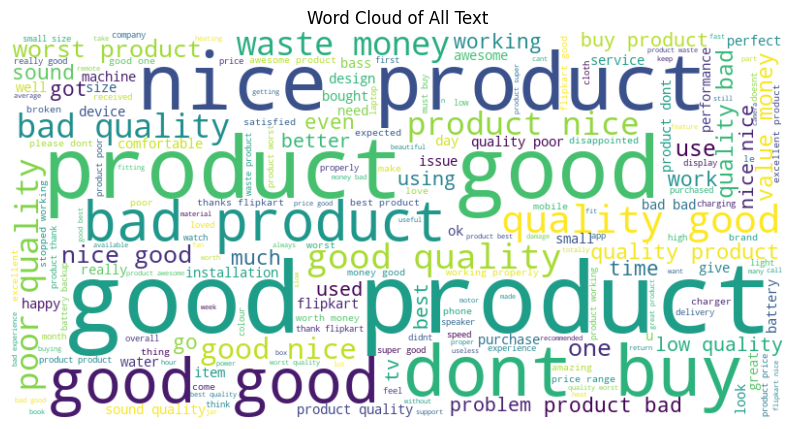

In [101]:
from wordcloud import WordCloud

# Assuming `df` has a column 'Text' for the text data
all_text = ' '.join(dataset['Summary'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()


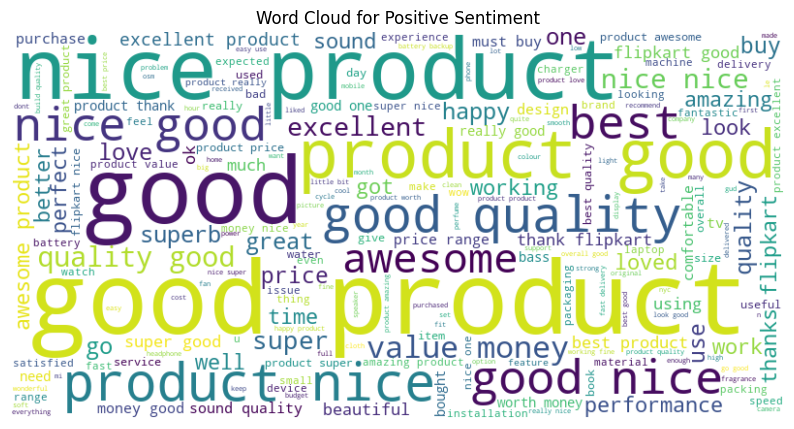

In [102]:
# Generate a word cloud for positive sentiment
positive_text = ' '.join(dataset[dataset['Sentiment'] == 'positive']['Summary'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


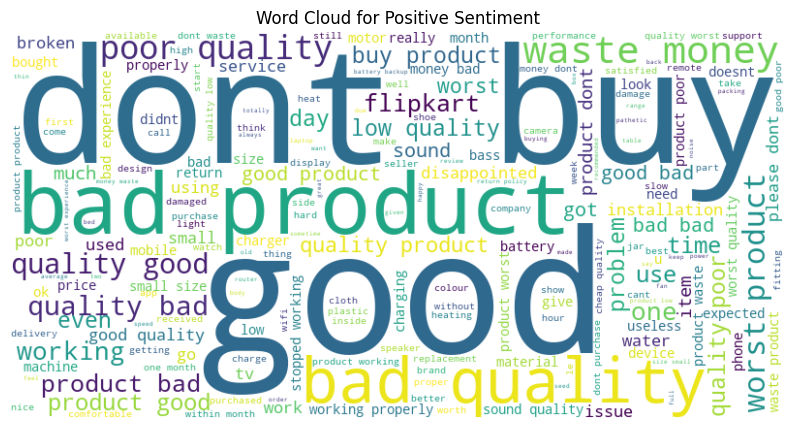

In [103]:
positive_text = ' '.join(dataset[dataset['Sentiment'] == 'negative']['Summary'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

In [120]:

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def SupportVectorMachinemodel(X_train, y_train, X_test, y_test):
        svm_model = SVC(kernel='linear')
        svm_model.fit(X_train, y_train)
        prediction = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
        plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
        plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
        plt.title("Distribution of True and Predicted Values", fontsize=16)
        plt.xlabel("Class/Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        print("Support Vector Machine accuracy : ", accuracy*100)

def DecisionTreemodel(X_train, y_train, X_test, y_test):
        tree_model = DecisionTreeClassifier()
        tree_model.fit(X_train, y_train)
        prediction = tree_model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
        plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
        plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
        plt.title("Distribution of True and Predicted Values", fontsize=16)
        plt.xlabel("Class/Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        print("DecisionTree accuracy : ", accuracy*100)

def LogisticRegressionModel(X_train, y_train, X_test, y_test):
    # Initialize and train the Logistic Regression model
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)
    prediction = lr_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction)
    print("Logistic Regression accuracy: {:.2f}%".format(accuracy * 100))

    # Create histograms
    plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
    plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
    plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
    plt.title("Distribution of True and Predicted Values", fontsize=16)
    plt.xlabel("Class/Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


def RandomForestmodel(X_train, y_train, X_test, y_test):
    # Initialize and train the RandomForest model
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    prediction = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction)
    print("Random Forest accuracy: {:.2f}%".format(accuracy * 100))

    # Create histograms
    plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
    plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
    plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
    plt.title("Distribution of True and Predicted Values", fontsize=16)
    plt.xlabel("Class/Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

Random Forest accuracy: 88.96%


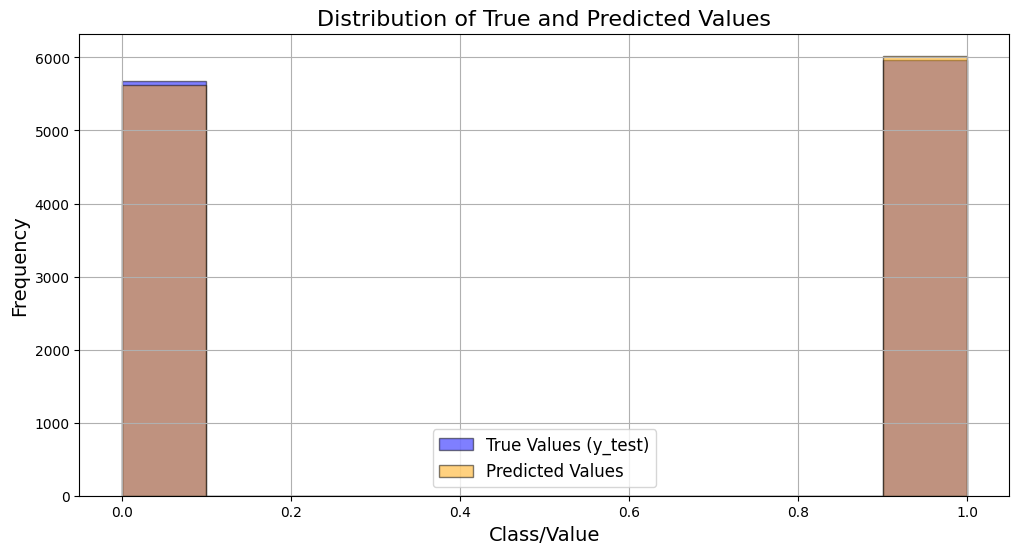

In [121]:
RandomForestmodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

In [122]:
SupportVectorMachinemodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

KeyboardInterrupt: 

DecisionTree accuracy :  88.27165793766635


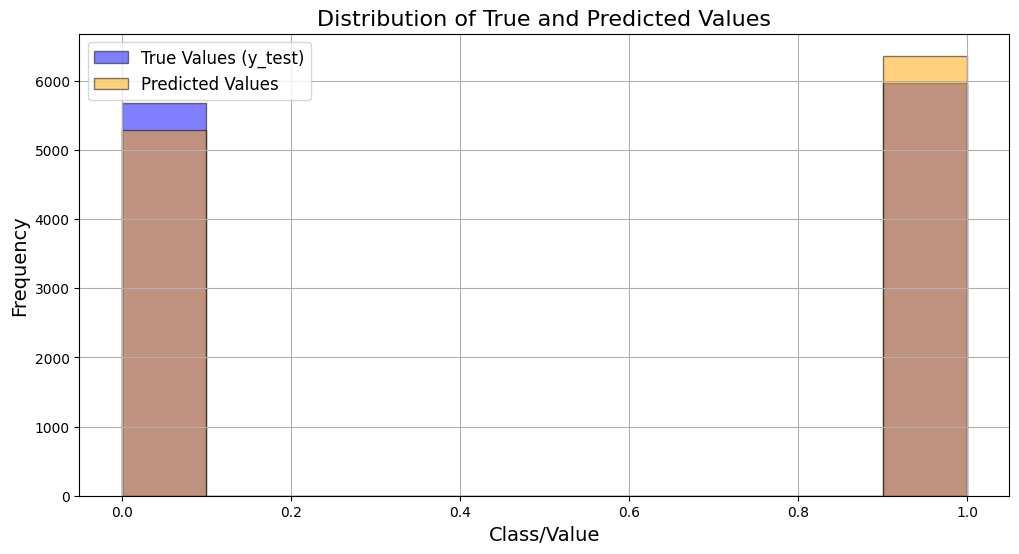

In [123]:
DecisionTreemodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

Logistic Regression accuracy: 89.77%


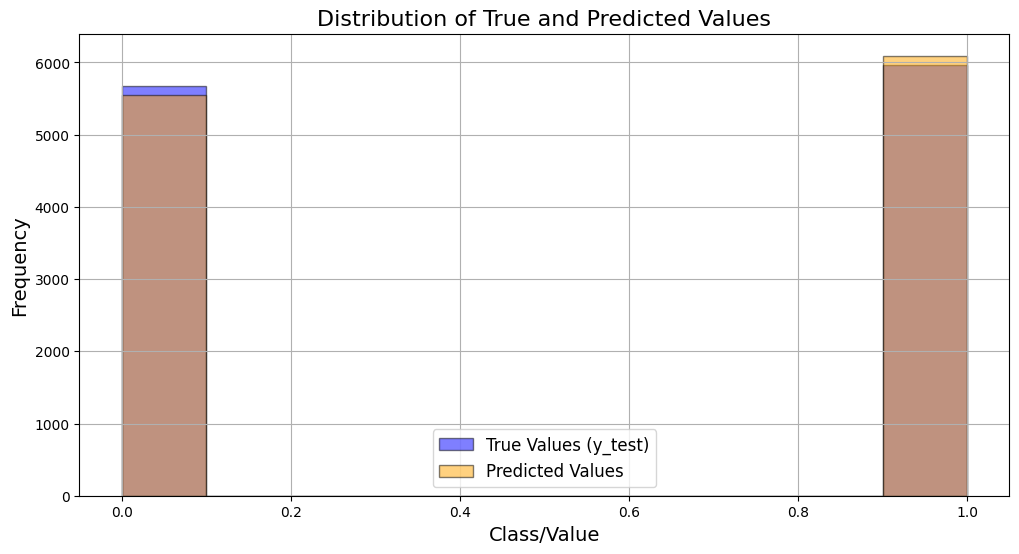

In [125]:
LogisticRegressionModel(X_train_tfidf, y_train, X_test_tfidf, y_test)